In [1]:
# let's import all our libraries for this task
import pandas as pd
import peptides as p
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pylab as pl
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [23]:
def build_kmers (seq, k):
    kmers = []
    n_kmers = len(seq)-k+1
    for i in range (n_kmers):
        kmer = seq[i:i +k]
        kmers.append(kmer)
    return kmers

In [50]:
build_kmers('VTYM',3)

['VTY', 'TYM']

In [24]:
df = pd.read_excel('prepAoP_Ken.xlsx')

In [25]:
df1 = df[df['clas'] == 1][['seq']]

In [26]:
df1['kmers'] = df1.apply(lambda x: build_kmers(x['seq'],3), axis = 1)

In [27]:
cmplt_pos = []
for i in df1['kmers']:
    for m in i:
        cmplt_pos.append(m)
print(cmplt_pos)

['EEH', 'EHL', 'HLC', 'LCF', 'CFR', 'AWV', 'WVD', 'VDY', 'MSF', 'SFR', 'FRF', 'RFY', 'EPL', 'PLR', 'LRY', 'RKP', 'KPP', 'PPW', 'PWP', 'WPP', 'YAK', 'AKR', 'KRC', 'RCF', 'CFR', 'VKA', 'KAG', 'AGF', 'GFA', 'FAW', 'AWT', 'WTA', 'TAN', 'ANQ', 'NQQ', 'QQL', 'QLS', 'YVG', 'VGD', 'LGN', 'GNT', 'NTD', 'TDY', 'DYA', 'YAV', 'AVH', 'HTY', 'TYH', 'YHE', 'HEV', 'EVT', 'VTK', 'TKH', 'WPV', 'PVL', 'VLA', 'LAY', 'AYH', 'YHF', 'HFT', 'IWC', 'WCK', 'CKD', 'KDD', 'DDQ', 'DQN', 'QNP', 'NPH', 'RPN', 'PNY', 'NYT', 'YTD', 'TDA', 'TSQ', 'SQL', 'QLL', 'LLS', 'LSD', 'SDQ', 'TRT', 'RTG', 'TGD', 'GDP', 'DPF', 'PFF', 'NFH', 'FHP', 'HPQ', 'GAW', 'AWA', 'GAL', 'ALA', 'LAA', 'AAH', 'WEG', 'EGP', 'GPK', 'GVP', 'VPL', 'PLT', 'YPP', 'PPA', 'PAK', 'PYF', 'YFN', 'FNK', 'AAA', 'AAA', 'AAG', 'IHS', 'HSG', 'SGS', 'GSV', 'SVG', 'NVL', 'VLV', 'LVG', 'NAA', 'AAK', 'AKL', 'SAG', 'AGN', 'GNP', 'NPN', 'CLM', 'LMA', 'MAR', 'ARP', 'RPN', 'PNY', 'NYR', 'YRC', 'RCK', 'CKI', 'KIF', 'IFK', 'FKQ', 'KQC', 'WYP', 'YPA', 'PAA', 'AAP', 'PSK'

In [28]:
cmplt_pos1 = []
for i in cmplt_pos:
    if cmplt_pos.count(i) >= 4:
        cmplt_pos1.append(i)

In [52]:
for i in cmplt_pos1:
    if i == 'TYM':
        print(cmplt_pos1.count(i))

In [214]:
cmplt_pos2 = set(cmplt_pos1)

In [67]:
pBOW = list(cmplt_pos2)

In [68]:
counts = []
for i in pBOW:
    count1 = cmplt_pos.count(i)
    counts.append(count1)
print(counts)

[4, 4, 6, 5, 4, 5, 8, 4, 6, 4, 6, 6, 4, 5, 6, 4, 4, 4, 6, 4, 4, 5, 5, 5, 5, 4, 10, 10, 8, 4, 5, 5, 4, 4, 4, 5, 7, 7, 4, 4, 4, 6, 5, 4, 4, 14, 5, 4, 8, 5, 4, 4, 7, 4, 5, 5, 4, 6, 4, 4, 4, 4, 6, 4, 4, 5, 4, 4, 4, 5, 5, 7, 5, 5, 4, 8, 10, 9, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 4, 8, 5, 6, 6, 4, 14, 5, 7, 6, 6, 4, 5, 10, 7, 6, 4, 4, 4, 6, 6, 5, 5, 4, 6, 4, 6, 4, 4, 5, 7, 4, 4, 5, 4, 4, 5, 5, 15, 5, 6, 4, 4, 6, 4, 4, 10, 9, 4, 6, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 7, 4, 10, 4, 4, 7, 4, 4, 10, 6, 4, 5, 4, 8, 4, 6, 4, 4, 7, 6, 4, 5, 4, 4, 4, 6, 4, 4, 5, 5, 4, 5, 5, 5, 7, 5, 10, 7, 4, 4, 4, 5, 9, 4, 9, 4, 5, 4, 4, 5, 7, 6, 4, 6, 13, 15, 4, 7, 5, 5, 4, 4, 4, 4, 5, 7, 8, 5, 4, 4, 4, 4, 6, 6, 6, 5, 8, 6, 4]


In [69]:
df_BOW = pd.DataFrame(pBOW, columns = ['BOW'])

In [70]:
df_BOW['count'] = counts

In [71]:
df_BOW

,BOW,count
0,VKE,4
1,EPV,4
2,ELE,6
3,GPS,5
4,SGL,4
...,...,...
227,GGF,6
228,LDG,5
229,RGP,8
230,GWN,6


In [72]:
df_BOW.to_excel('Scavenpred_BOW.xlsx')

In [73]:
compl_pos = str(cmplt_pos1)
kmer = ''
kmer += " ".join(cmplt_pos1)+" "
kmer

'GFA TDY PVL NPH PNY QLL LLS LSD DPF GAW ALA GPK GVP PPA AAA AAA AAG VLV LVG NAA AAK PNY RCK GAG ALL LLL LEE EEL ELE LEE EEE EEL ELE LEG PFH YFY FYP YPE PEL FLH HDH LLP FLH GPL PLG LGP GPL YDE EER ELE LVG RPP PVG PVL AEV PYP LLL AAG AGR DAG CYG YGP GPN PNR NRP RPQ WYS YSL EQE ESG GVP VPV AGP GPT TGP GPA PAG AGP GPL GGY YDE GGY YDE PDP PGP GPG PGP GPM GAP APG PGA RGP GPN SGP GPP PVP PGP GPI GPM VPS YPQ PQL QLL LLP SGP GPP PVP PGP GPM GPM SGL RPQ PQQ QQG QGP GPA YPW VYP GDA DAG AGG GGY LVG GPA PAG AGP GPA PAG PSG EAD GDG DAP PVP PER DEL VLG LGL NAA PAG AGP LDG GQG VEG SDG VLP GAG LPG PGK PII EAD DGD GDG DGD DEQ LEE DGD GDG GFA AGD GDD DAP FPE PEL YLG LGY LEQ QLL VLP LPV PVP VPQ KAV AVP VPY PYP YPQ PQR VIP PYV VLV TDY VKE EAM AMA APK VPS IPI YVL QHQ HQQ EEE GPL GDV VLV VIP PAG AGY PVA EAG HPE PEL YDE EEK EQG EEE AGE NIP GKP PVA VAV AVP KAV ERY AVP VPY PYP YPQ TAV GDV GVP YVL LLP VAP PFP FPE VLP LPV PVP VPK DEL EEK GLK LLS LSD SDG GAA AAA AAA QLL LLP LPQ PQY LLS LSD SDG GAA AAA AAA AAK AKG

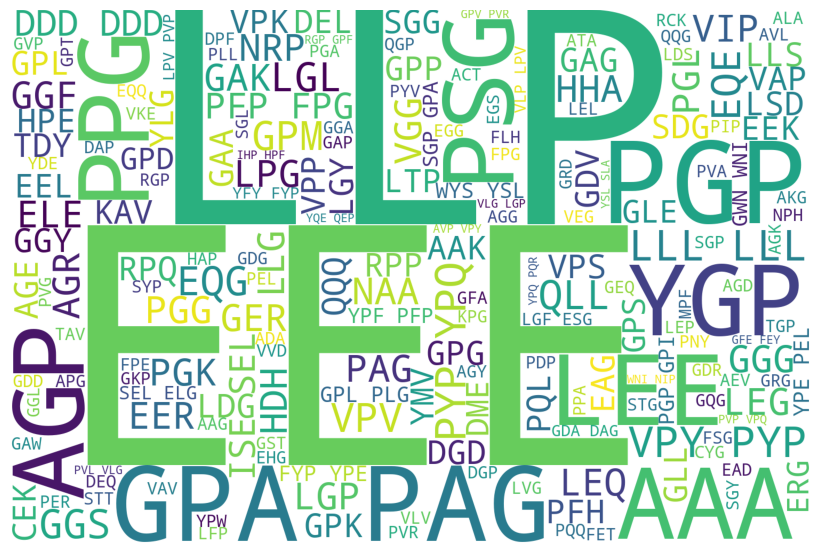

In [74]:
wordcloud = WordCloud(width = 1500, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(kmer)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [21]:
df = pd.read_excel('negative_data.xlsx')

In [2]:
df = pd.read_excel('AOP_random.xlsx')

In [21]:
df[df['class'] == 1].shape

(792, 2)

In [22]:
df['AAC'] = df.apply(lambda x: p.Peptide(x['seq']).descriptors(),axis = 1) #to extract the amino acid descriptors
df4 = pd.DataFrame.from_records(df['AAC'])
df5 = df.drop(['AAC'], axis = 1)
df6 = pd.concat([df5,df4], axis = 1)
df6

,seq,class,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,...,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,Z1,Z2,Z3,Z4,Z5
0,FVNPA,0,-0.056000,-0.320000,-0.016000,0.164000,-0.406000,-0.110000,0.294000,-0.170000,...,-0.450000,-0.014000,-0.504000,-0.134000,0.410000,-1.036000,-0.226000,0.600000,-0.180000,0.854000
1,WFEPP,0,0.008000,0.432000,0.190000,-0.618000,-0.638000,-0.718000,0.026000,-0.128000,...,0.210000,-0.236000,-0.540000,-0.362000,1.218000,-1.758000,1.336000,1.044000,0.468000,0.308000
2,EHYQV,0,0.204000,0.518000,-0.710000,0.256000,-0.030000,-0.254000,-0.108000,0.050000,...,-0.094000,-0.162000,0.076000,0.088000,-0.058000,0.440000,0.502000,-0.480000,-0.258000,-0.198000
3,TVLIG,0,-0.592000,-0.756000,-0.072000,0.070000,-0.340000,0.470000,0.180000,-0.144000,...,-0.658000,0.030000,-1.114000,0.180000,-0.346000,-1.592000,-2.382000,-1.100000,-0.938000,0.060000
4,FLQLP,0,-0.494000,-0.218000,-0.512000,-0.262000,-0.246000,-0.226000,0.122000,0.050000,...,-0.310000,0.154000,-0.676000,-0.312000,0.342000,-2.538000,0.022000,-0.304000,-0.308000,0.744000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,PSYV,0,-0.137500,-0.155000,-0.102500,0.065000,-0.440000,-0.450000,0.277500,-0.345000,...,-0.385000,0.105000,-0.555000,-0.507500,0.780000,-1.100000,-0.250000,0.470000,-0.375000,0.295000
1660,IEEEQ,0,0.814000,-0.028000,-0.728000,-0.284000,-0.188000,-0.008000,-0.720000,0.296000,...,-0.112000,-1.218000,-0.340000,0.474000,-0.096000,1.438000,-0.090000,-0.696000,-2.260000,0.034000
1661,VPR,0,0.253333,-0.573333,-0.370000,-0.473333,-0.186667,-0.553333,0.506667,-0.050000,...,-0.196667,0.586667,-0.423333,0.290000,1.453333,-0.243333,0.043333,-1.066667,0.613333,0.603333
1662,GSAGPAGPSGPRGP,1,0.758571,-0.315714,0.800714,-0.214286,-0.396429,-0.033571,0.817857,0.102143,...,0.729286,-0.124286,-0.790714,0.716429,0.545000,0.885000,-1.678571,0.654286,-0.169286,0.705000


C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\2405833057.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5',


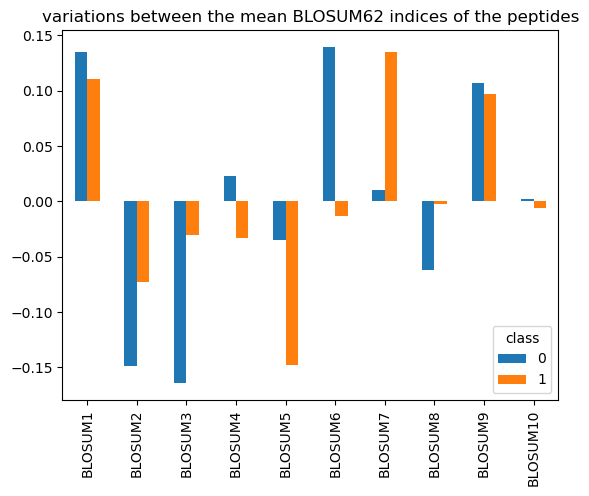

In [1939]:
# we go by the BLOSUM matrix
plot = df6.groupby('class')['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5',
       'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean BLOSUM62 indices of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_27040\4278557798.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['PP1', 'PP2',


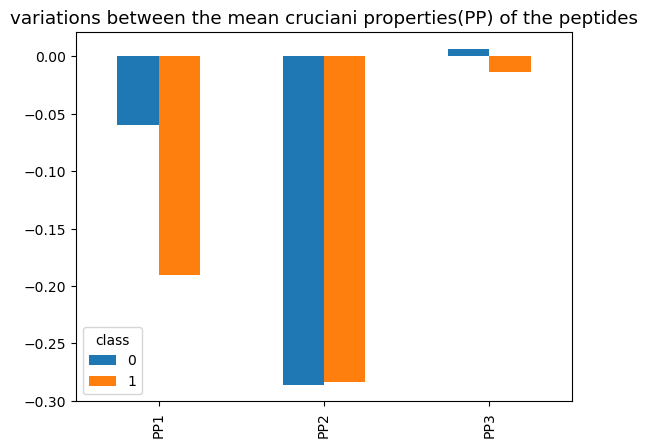

In [136]:
# we go by the Cruciani properties descriptors
plot = df6.groupby('class')['PP1', 'PP2',
       'PP3'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.rcParams.update({'font.size': 11})
plt.title('variations between the mean cruciani properties(PP) of the peptides')
plt.savefig("variation_AOP_PP.svg", dpi=300)
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\915426972.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['F1', 'F2', 'F3', 'F4', 'F5', 'F6'].mean()


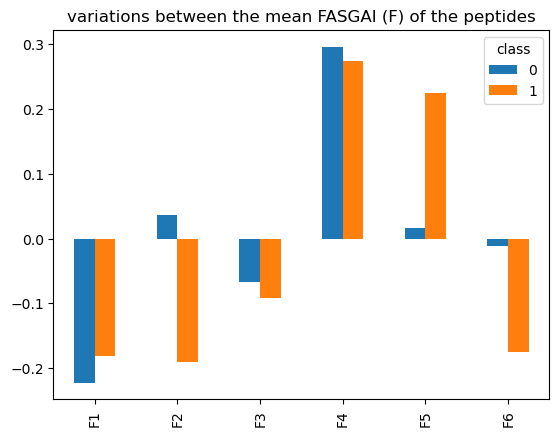

In [1941]:
# we go by the FASGAI vectors
plot = df6.groupby('class')['F1', 'F2', 'F3', 'F4', 'F5', 'F6'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean FASGAI (F) of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\1505586743.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['KF1', 'KF2', 'KF3', 'KF4',


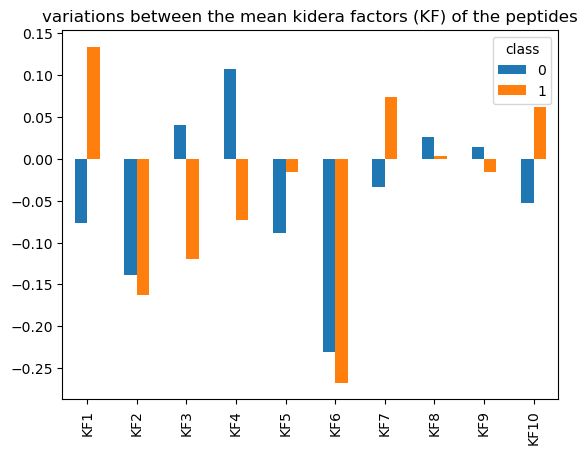

In [1942]:
# we go by the Kidera factors vectors
plot = df6.groupby('class')['KF1', 'KF2', 'KF3', 'KF4',
       'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean kidera factors (KF) of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\3811735216.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['MSWHIM1', 'MSWHIM2',


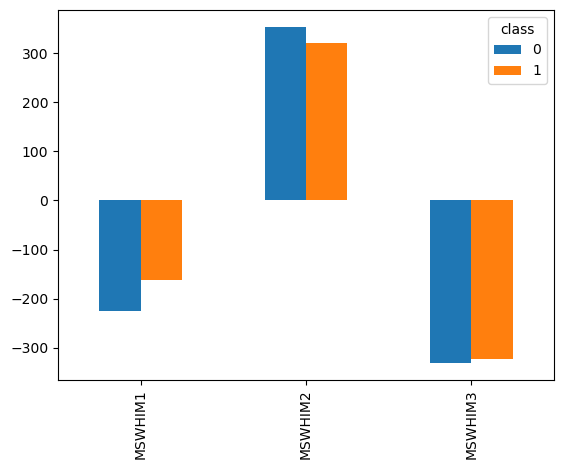

In [1943]:
# we go by the MS-WHIM vectors
plot = df6.groupby('class')['MSWHIM1', 'MSWHIM2',
       'MSWHIM3'].sum()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\2883511548.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')[ 'E1', 'E2', 'E3', 'E4', 'E5'].mean()


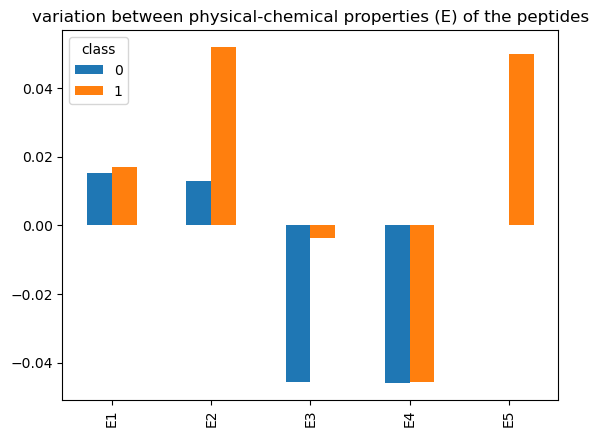

In [1944]:
# we go by the PCP descriptors vectors
plot = df6.groupby('class')[ 'E1', 'E2', 'E3', 'E4', 'E5'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variation between physical-chemical properties (E) of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\323070016.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['PD1', 'PD2'].mean()


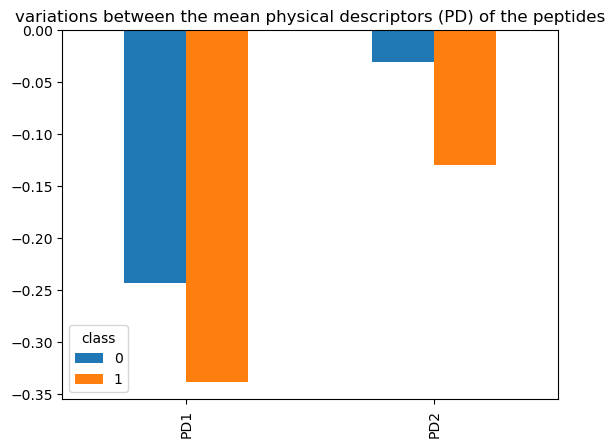

In [1945]:
# we go by the PCP descriptors vectors
plot = df6.groupby('class')['PD1', 'PD2'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean physical descriptors (PD) of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\3038191175.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')[ 'ProtFP1',


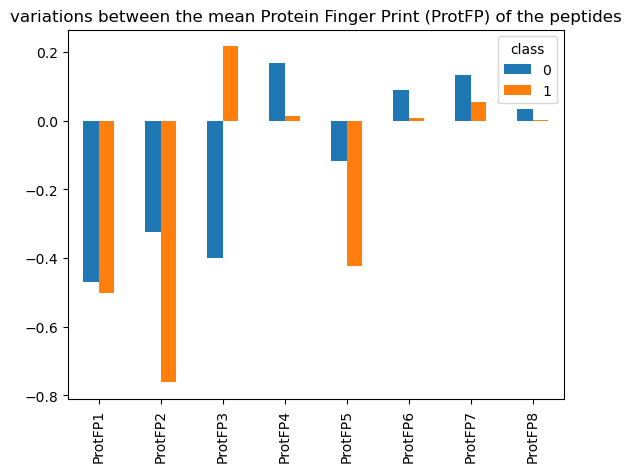

In [1946]:
# we go by the protfp descriptors
plot = df6.groupby('class')[ 'ProtFP1',
       'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7',
       'ProtFP8'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean Protein Finger Print (ProtFP) of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\3411905553.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['SV1', 'SV2', 'SV3', 'SV4'].mean()


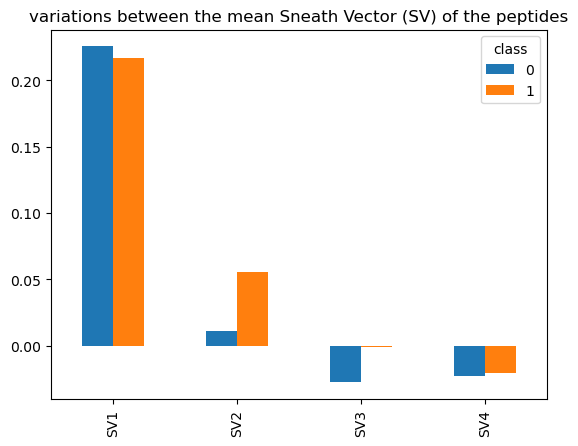

In [1947]:
# we go by the Sneath Vectors
plot = df6.groupby('class')['SV1', 'SV2', 'SV3', 'SV4'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean Sneath Vector (SV) of the peptides')
plt.show()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


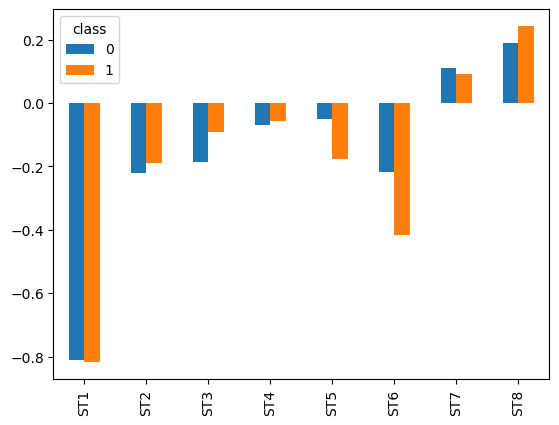

In [650]:
# we go by the ST-scales descriptors
plot = df6.groupby('class')['ST1', 'ST2', 'ST3', 'ST4',
       'ST5', 'ST6', 'ST7', 'ST8'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\3150207021.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['SVGER1', 'SVGER2', 'SVGER3', 'SVGER4',


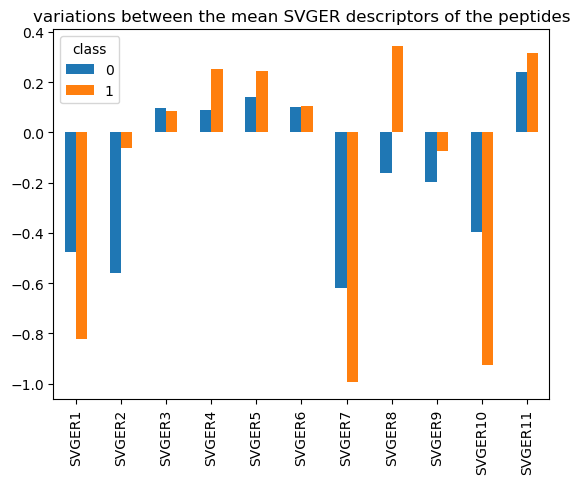

In [1949]:
# we go by the SVGER descriptors
plot = df6.groupby('class')['SVGER1', 'SVGER2', 'SVGER3', 'SVGER4',
       'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean SVGER descriptors of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\3858842676.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['T1', 'T2', 'T3', 'T4', 'T5'].mean()


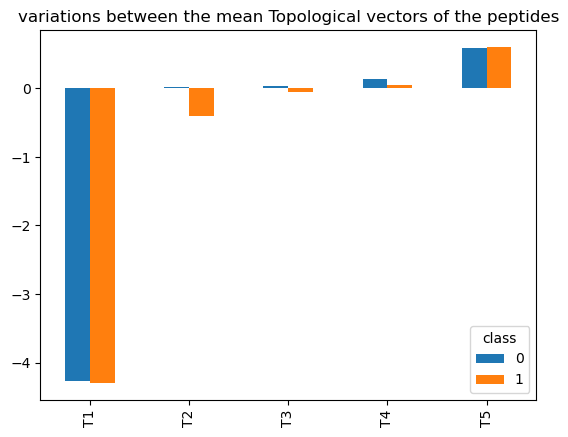

In [1950]:
# we go by the t-scales descriptors
plot = df6.groupby('class')['T1', 'T2', 'T3', 'T4', 'T5'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean Topological vectors of the peptides')
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_29920\951370864.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['VHSE1', 'VHSE2', 'VHSE3', 'VHSE4',


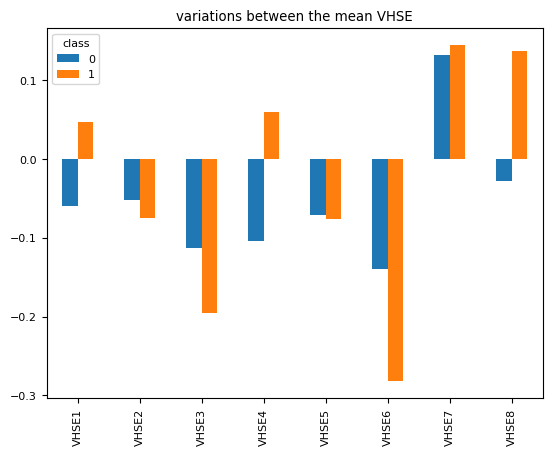

In [16]:
# we go by the VHSE descriptors
plot = df6.groupby('class')['VHSE1', 'VHSE2', 'VHSE3', 'VHSE4',
       'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean VHSE')
plt.savefig("variation_AOP_VHSE.svg", bbox_inches='tight', dpi=2000)
plt.show()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\2786251379.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['Z1', 'Z2', 'Z3', 'Z4', 'Z5'].mean()


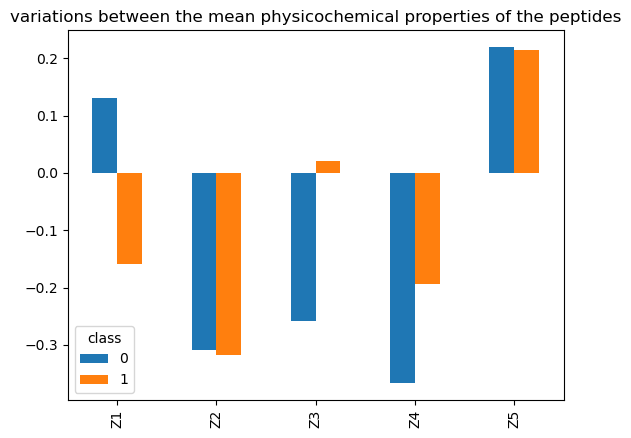

In [1952]:
# we go by the VHSE descriptors
plot = df6.groupby('class')['Z1', 'Z2', 'Z3', 'Z4', 'Z5'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.title('variations between the mean physicochemical properties of the peptides')
plt.show()

In [558]:
X_train = df6[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5',
       'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2',
       'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF4',
       'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2',
       'MSWHIM3', 'E1', 'E2', 'E3', 'E4', 'E5', 'PD1', 'PD2', 'ProtFP1',
       'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7',
       'ProtFP8', 'SV1', 'SV2', 'SV3', 'SV4', 'ST1', 'ST2', 'ST3', 'ST4',
       'ST5', 'ST6', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4',
       'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11',
       'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4',
       'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5']]
y_train = df6['class']

In [81]:
X_train = df6[['BLOSUM6', 'PP3', 'F2','KF3', 'KF4', 'KF7', 'KF10', 'ProtFP3',
              'SVGER8', 'T2', 'VHSE4', 'VHSE8', 'Z1', 'Z3', 'F5', 'F6','BLOSUM4', 'BLOSUM7', 'ProtFP5','E2','E3','T3',
              'ProtFP6','SV3', 'VHSE1', 'KF1',]]
y_train = df6['class']

In [564]:
X_train = df6[['BLOSUM6', 'PP3', 'F2','KF3', 'KF4', 'KF7', 'KF10', 'ProtFP3',
              'SVGER8', 'T2', 'VHSE4', 'VHSE8', 'Z1', 'Z3', 'BLOSUM4','T3', 'VHSE1', 'KF1', 'BLOSUM7', 'BLOSUM8','F6',
              'ProtFP5','SV3']]
y_train = df6['class']

In [311]:
X_train = df6[['BLOSUM7', 'F5', 'F6','KF1','KF4','E3','ProtFP3', 'SVGER8', 'SV2', 'T2']]
y_train = df6['class']

In [570]:
X_train = df6[['BLOSUM6','BLOSUM4','BLOSUM7','PP3','F2','F5', 'KF4','SVGER8',]]
y_train = df6['class']

In [571]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=7,
                                       n_estimators=1000, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=42)

In [7]:
df_test = pd.DataFrame({'seq': ['NNLFCGIDSK', 'WALDNVNLR','FDVGNVVMVTGGR','LIYIVQGR', 'GAAGGAAGAK','GLLLPAYTNVPK', 'PAQPNFR',
                               'KRALLAWCLLFLVC', 'QQPQPW', 'PVPVEGV', 'YTPEYETKDTDILAAF','ISEELDHAL','VTYM', 'HNPIPIYLR']})

In [612]:
df_test['AAC'] = df_test.apply(lambda x: p.Peptide(x['seq']).descriptors(),axis = 1) #to extract the amino acid descriptors
df4 = pd.DataFrame.from_records(df_test['AAC'])
df5 = df_test.drop(['AAC'], axis = 1)
df_test = pd.concat([df5,df4], axis = 1)

In [19]:
df_test['len'] = df_test.apply(lambda x: len(x['Sequence']), axis = 1)

In [9]:
df_test.shape

(279, 90)

In [21]:
#X_test = df_test[['BLOSUM6', 'BLOSUM10', 'PP3', 'F2', 'KF1','KF3', 'KF4', 'KF7', 'KF9', 'KF10', 'ProtFP3',
              #'SVGER8', 'T2', 'VHSE1', 'VHSE4', 'VHSE8', 'Z1', 'Z3', 'F5', 'F6','BLOSUM4', 'BLOSUM7', 'ProtFP5','E2', 'E3']]
#y_test = df_test['class']

In [560]:
X_test = df_test[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5',
       'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2',
       'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF4',
       'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2',
       'MSWHIM3', 'E1', 'E2', 'E3', 'E4', 'E5', 'PD1', 'PD2', 'ProtFP1',
       'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7',
       'ProtFP8', 'SV1', 'SV2', 'SV3', 'SV4', 'ST1', 'ST2', 'ST3', 'ST4',
       'ST5', 'ST6', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4',
       'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11',
       'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4',
       'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5']]
y_test = df_test['class']

In [566]:
X_test = df_test[['BLOSUM6', 'PP3', 'F2','KF3', 'KF4', 'KF7', 'KF10', 'ProtFP3',
              'SVGER8', 'T2', 'VHSE4', 'VHSE8', 'Z1', 'Z3', 'BLOSUM4','T3', 'VHSE1', 'KF1', 'BLOSUM7', 'BLOSUM8','F6',
                 'ProtFP5','SV3']]
y_test = df_test['class']

In [572]:
X_test = df_test[['BLOSUM7', 'F5', 'F6','KF1','KF4','E3','ProtFP3', 'SVGER8', 'SV2','T2']]
y_test = df_test['class']

In [613]:
X_test = df_test[['BLOSUM6','BLOSUM4','BLOSUM7','PP3','F2','F5','KF4','SVGER8',]]
#y_test = df_test['class']

In [614]:
rf_yhat = rf.predict(X_test)
rf_yhat[-1]

1

In [615]:
rf.predict_proba(X_test)[-1]

array([0.49, 0.51])

In [151]:
X_train = df6[['BLOSUM6', 'BLOSUM10', 'PP3', 'F2', 'KF1','KF3', 'KF4', 'KF7', 'KF9', 'KF10', 'ProtFP3', 'SV3',
              'SVGER8', 'T2', 'T3', 'VHSE1', 'VHSE4', 'VHSE8', 'Z1', 'Z3']]


In [152]:
df_test = pd.read_excel('DDA detected peptide sets from CAG project1.xlsx', sheet_name = 'Faba bean urea Trp_pred')

In [444]:
df_test = pd.read_csv('additional.csv')

In [15]:
df_test = pd.read_excel('Bambara for pred.xlsx')

In [611]:
df_test = pd.read_excel('B2S4_ACE.xlsx')

In [43]:
df_test.drop_duplicates(inplace = True)

In [608]:
oat = pd.DataFrame({'seq':df_test['seq'],
                   'pred_rf': rf_yhat,
                   'QCM_rf': rf.predict_proba(X_test)[:,1]})
                    #'Class':df_test['class']})
                   #'svm_pred':SVM_yhat,
                   #'svm_QCM':svm_prob,
                   #'ens_pred':ens_pred,
                   #'ens_prob':ens_prob})

In [609]:
print(round((len(oat[oat['QCM_rf'] >= 0.8])/len(oat)*100),2))

2.36


In [610]:
oat.to_excel('B2S2_AOP.xlsx')

In [49]:
oat.to_excel('faba_bean_urea_pred.xlsx')

In [9]:
X_test1 = pd.read_excel('testing.xlsx')

In [87]:
df_test = pd.read_excel('oat_matching.xlsx')

In [29]:
oat[oat['QCM_rf']>0.8].shape

(172, 4)

In [51]:
oat.to_excel('all_bambara_Scavenpred.xlsx')

In [50]:
oat[oat['QCM_rf'] >=0.8]

,seq,pred_rf,QCM_rf,len
0,KPRPFPIPR,1,0.937692,9
48,PVNSPGR,1,0.812082,7
108,GALLLPH,1,0.819343,7
192,PNTLLLPH,1,0.850492,8
316,EGGLLMPHYN,1,0.809323,10
...,...,...,...,...
5820,SGDVWFPQPAPK,1,0.866588,12
5971,GLNIPVGK,1,0.835343,8
6039,SGMGLPVGK,1,0.872193,9
6041,VHAAPGGGSSLGYLFGGPGEGK,1,0.924879,22


In [37]:
df_test = pd.read_excel('Scave_test.xlsx')

In [580]:
df_test2 = pd.read_excel('pred_14_25.xlsx')

In [7]:
df_test = pd.read_csv('Tan_pep2.csv')

In [72]:
df_test = pd.read_excel('Aparna_oat milk_DIApeps.xlsx')

In [578]:
df_test2 = pd.read_excel('all_oat.xlsx')

In [582]:
df_test.shape

(279, 90)

In [62]:
df_test.to_excel('test_data_features.xlsx')

In [63]:
oat.drop_duplicates(inplace = True)

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('positive label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.55      0.85      0.67        59
           1       0.95      0.81      0.88       220

    accuracy                           0.82       279
   macro avg       0.75      0.83      0.77       279
weighted avg       0.87      0.82      0.83       279

Confusion matrix, without normalization
[[179  41]
 [  9  50]]


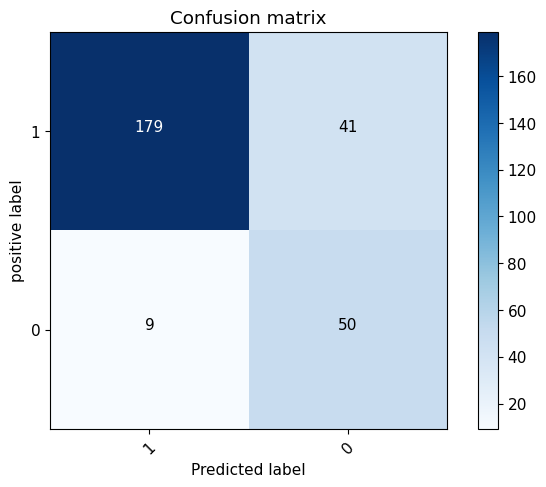

In [577]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, rf_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],normalize= False,  title='Confusion matrix')

In [1991]:
oat.loc[(oat['QCM_rf'] < 0.5), 'label'] = 'negative'
oat.loc[(oat['QCM_rf'] >= 0.5), 'label'] = '0.5 and above'
oat.loc[(oat['QCM_rf'] >= 0.6), 'label'] = '0.6 and above'
oat.loc[(oat['QCM_rf'] >= 0.7), 'label'] = '0.7 and above'
oat.loc[(oat['QCM_rf'] >= 0.8), 'label'] = '0.8 and above'

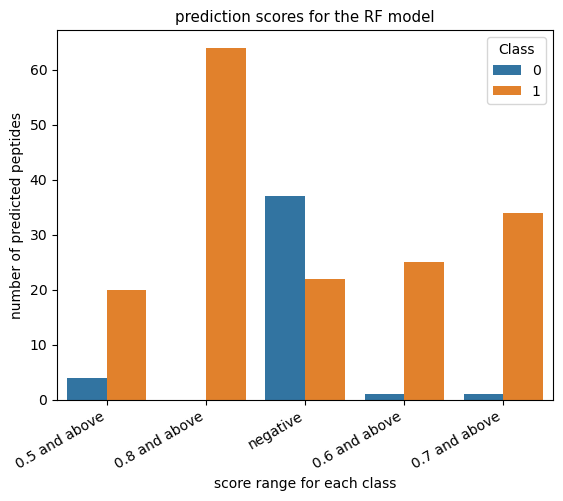

In [1993]:
sns.countplot(x = 'label',hue = 'Class', data = oat)
#sns.set(rc={'figure.figsize':(10,10)})
plt.rcParams.update({'font.size': 9})
plt.xticks(rotation=30, ha = 'right')
plt.title('prediction scores for the RF model')
plt.ylabel('number of predicted peptides')
plt.xlabel('score range for each class')
plt.show()

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7598566308243727

In [25]:
model1_yhat = model.predict(X_test)

In [26]:
OXTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
OXTree # it shows the default parameters
OXTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [27]:
Tree_yhat = OXTree.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, Tree_yhat))

DecisionTrees's Accuracy:  0.7849462365591398


In [28]:
from sklearn.ensemble import AdaBoostClassifier
model1 = AdaBoostClassifier(random_state=1)
model1.fit(X_train, y_train)
model1.score(X_test,y_test)

0.8028673835125448

In [29]:
model1_yhat = model1.predict(X_test)

In [30]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C = 1000, probability=True)
clf.fit(X_train, y_train)

SVC(C=1000, probability=True)

In [31]:
SVM_yhat = clf.predict(X_test)

In [88]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='saga')

In [90]:
LR_yhat = LR.predict(X_test)

In [35]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, LR_yhat,pos_label=1)

0.7669491525423728

In [36]:
k = 12
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=12)

In [37]:
KNN_yhat = neigh.predict(X_test)

In [38]:
pred_prob1 = rf.predict_proba(X_test)
pred_prob2 = model1.predict_proba(X_test)
pred_prob3 = neigh.predict_proba(X_test)

C:\Users\kuagbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\kuagbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


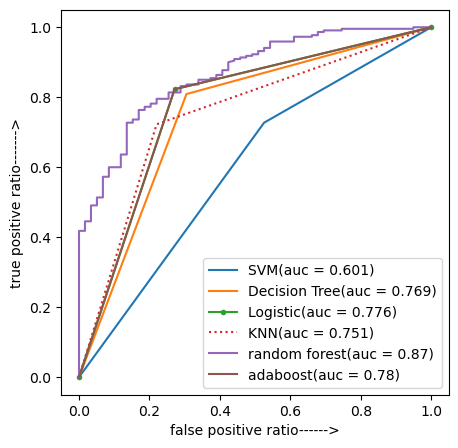

In [41]:
from sklearn.metrics import roc_curve,auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, LR_yhat)
auc_logistic = auc(logistic_fpr, logistic_tpr)

Tree_fpr, Tree_tpr, threshold = roc_curve(y_test, Tree_yhat)
auc_Tree = auc(logistic_fpr, Tree_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
auc_rf = auc(rf_fpr, rf_tpr)

KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, KNN_yhat)
auc_KNN = auc(KNN_fpr, KNN_tpr)

model1_fpr, model1_tpr, threshold = roc_curve(y_test, model1_yhat)
auc_model1 = auc(model1_fpr, model1_tpr)


svm_fpr, svm_tpr, threshold = roc_curve(y_test, SVM_yhat)
auc_svm = auc(svm_fpr, svm_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr,svm_tpr, linestyle = '-', label = 'SVM(auc = %0.3f)'%auc_svm)
plt.plot(Tree_fpr,Tree_tpr, linestyle = '-', label = 'Decision Tree(auc = %0.3f)'%auc_Tree)
plt.plot(logistic_fpr,logistic_tpr, marker = '.', label = 'Logistic(auc = %0.3f)' %auc_logistic)
plt.plot(KNN_fpr,KNN_tpr, linestyle = ':', label = 'KNN(auc = %0.3f)'%auc_KNN)
plt.plot(rf_fpr,rf_tpr, linestyle = '-', label = 'random forest(auc = %0.2f)'%auc_rf)
plt.plot(model1_fpr,model1_tpr, linestyle = '-', label = 'adaboost(auc = %0.2f)'%auc_model1)
plt.xlabel('false positive ratio------>')
plt.ylabel('true positive ratio------->')
plt.legend()
plt.savefig('ROC.svg',dpi=1000)
plt.show()

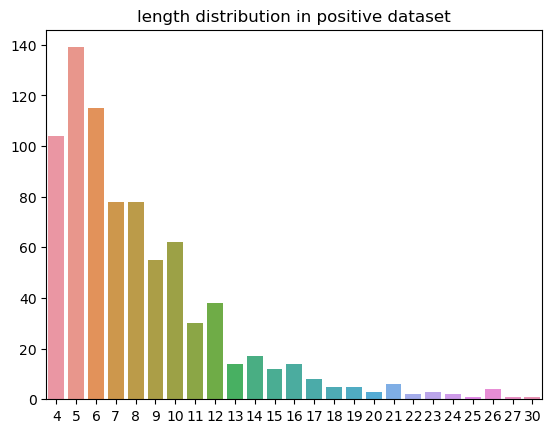

In [50]:
sns.barplot(x = list_len, y = count)
plt.title('length distribution in positive dataset')
plt.show()

In [29]:
df1[df1['len'] == 31]

,seq,clas,len
1034,GFWDSVKEGLKNAAVTILNKIKCKISECPPA,1,31
1037,GLLDSVKEGLKKVAGQLLDTLKCKISGCTPA,1,31


In [70]:
# let's calculate the proportions of the individual residues in the peptides
#let's create the function that will calculate the proportion of amino acids in a given peptide
def prop2 (df,amino,seq):
    df[amino] = round(df.apply(lambda x: x['seq'].count(amino)/len(x['seq']), axis = 1),2)
    return df

In [71]:
peps = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V']
for aa in peps:
    prop2 (df,aa,df['seq'])

In [72]:
# amino acid composition as features
plot = df.groupby('class')['A','C','D', 'E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','Y','W'].sum()

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_31532\4074648803.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df.groupby('class')['A','C','D', 'E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','Y','W'].sum()


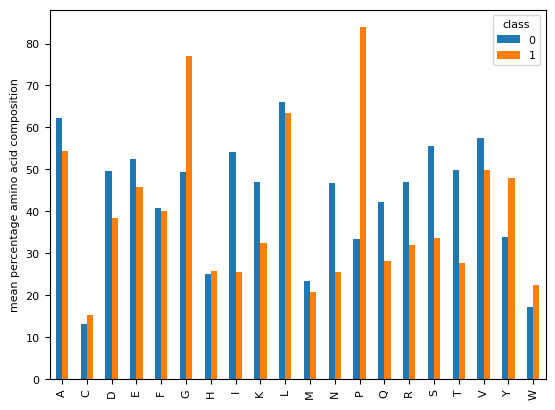

In [73]:
plt.rcParams.update({'font.size': 8})
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.ylabel ('mean percentage amino acid composition')
plt.savefig("AAC_AOP.svg", dpi=2000)
plt.show()

In [ ]:
import seaborn as sns
corr = X_train.corr()
corr.iloc[:,50:55]

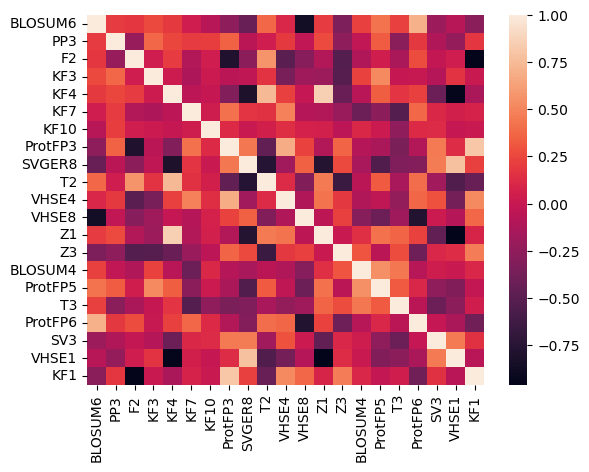

In [113]:
dataplot = sns.heatmap(X_train.corr(numeric_only=True))
plt.show()

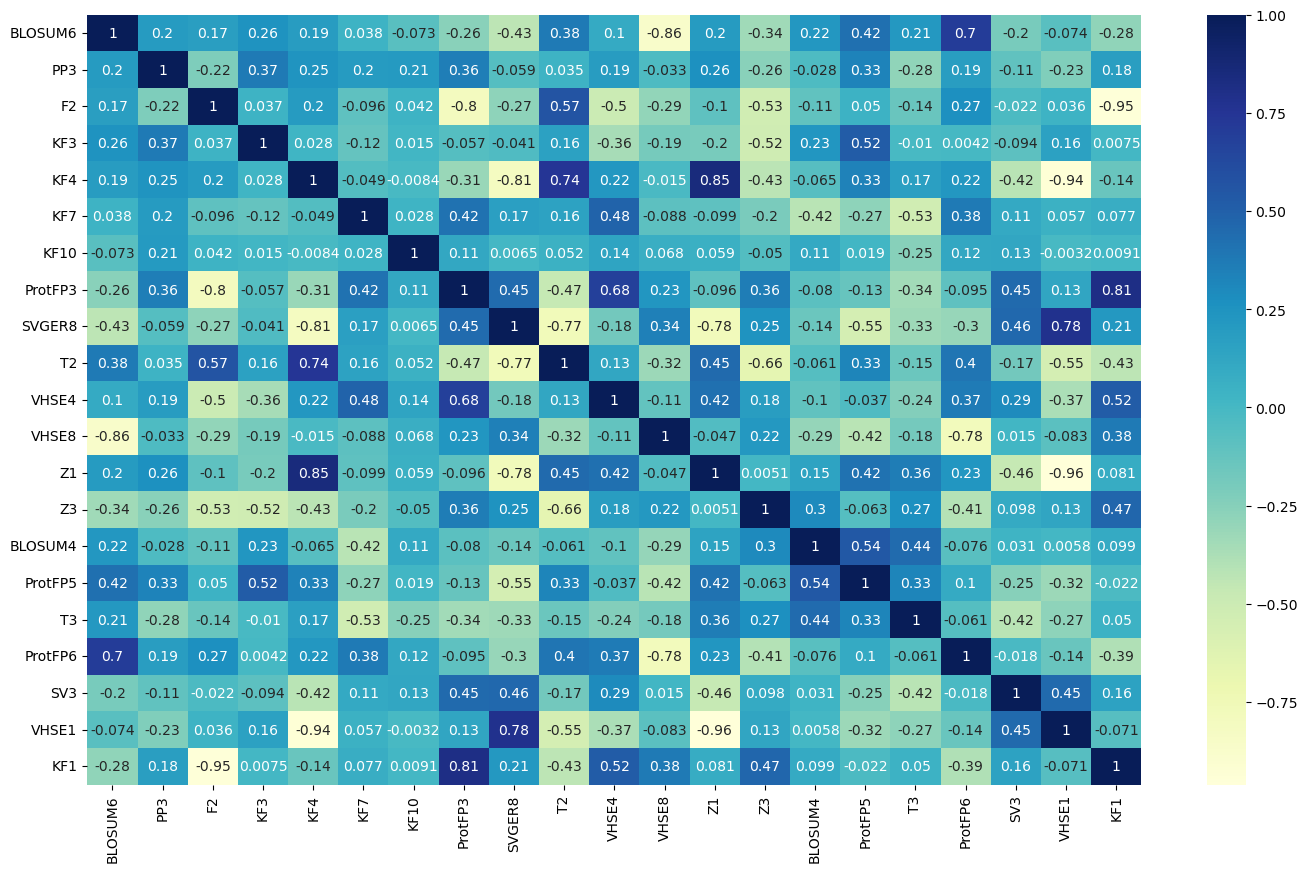

In [114]:
f, ax = plt.subplots(figsize=(17, 10))
dataplot = sns.heatmap(X_train.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

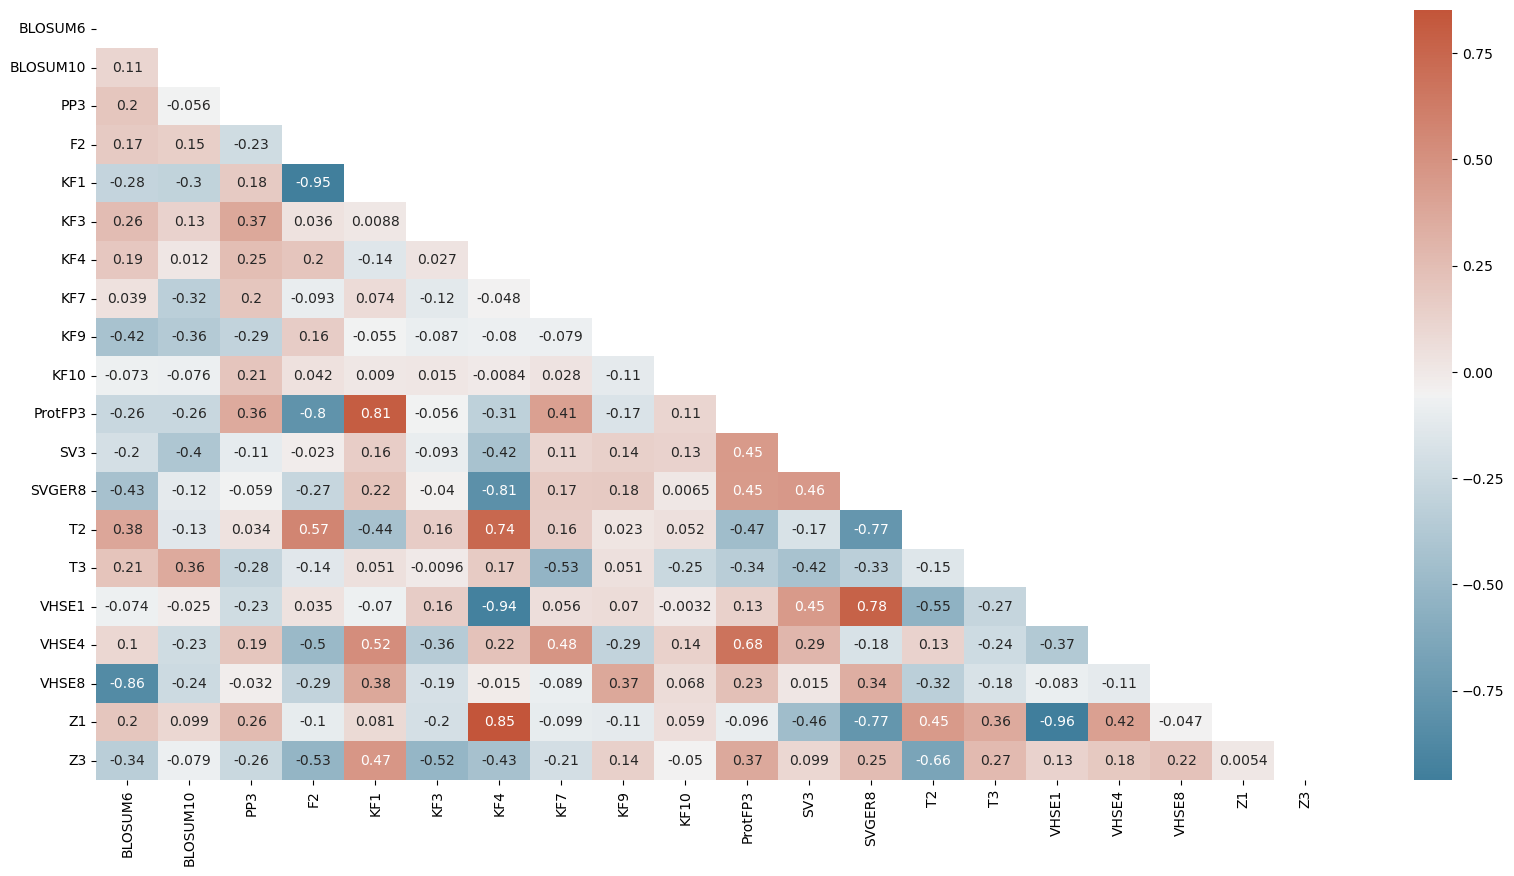

In [17]:
corr = X_train.corr()
f, ax = plt.subplots(figsize=(20, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

In [665]:
df6.to_excel('cor.xlsx')

In [666]:
from scipy.stats.stats import pearsonr

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_17320\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [50]:
df_feature = pd.read_excel('fet.xlsx')

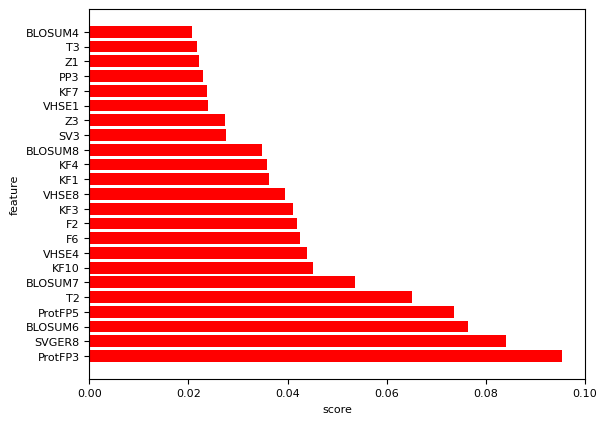

In [51]:
plt.barh(df_feature['features'], df_feature['score'], color = 'r')
plt.xlabel('score')
plt.ylabel('feature')
plt.show()

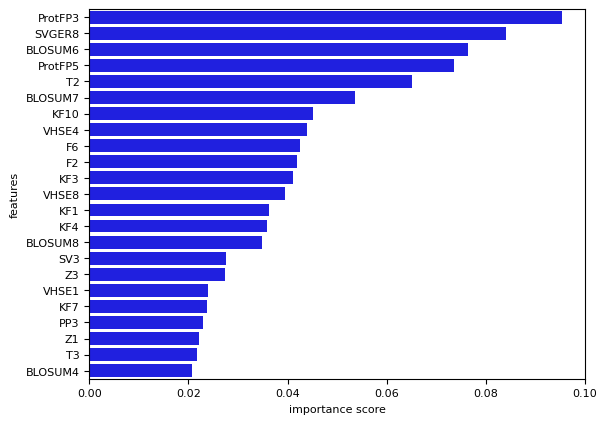

In [52]:
sns.barplot(data = df_feature, y = 'features', x = 'score', color = 'b')
plt.xlabel('importance score')
plt.ylabel('features')
plt.show()

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
import shap

In [88]:
explainer = shap.Explainer(rf)

In [89]:
shap_values = explainer(X_test)

TypeError: only integer scalar arrays can be converted to a scalar index

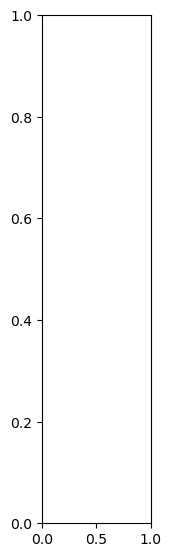

In [90]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.bar(shap_values)

In [269]:
explainer = shap.TreeExplainer(rf)

In [270]:
shap_values = explainer.shap_values(X_test)

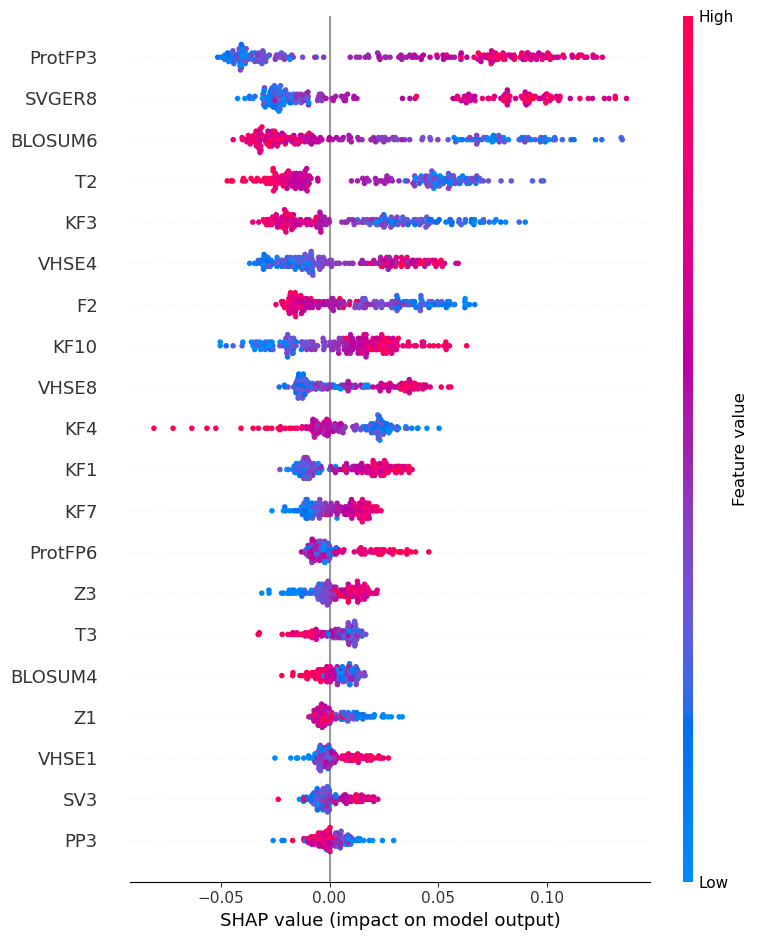

In [271]:
shap_values = explainer.shap_values(X_test)

In [80]:
import scipy.stats as stats

In [91]:
stats.ttest_ind(a = X_p, b = X_n, equal_var = 'False')

Ttest_indResult(statistic=11.930862965585025, pvalue=1.5206725472525345e-31)

In [72]:
x_p = X_p.values
x_n = X_n.values

In [73]:
print(np.var(x_p), np.var(x_n))

0.03989097400142199 0.035001822101471965


In [74]:
(np.var(x_p)/np.var(x_n))

1.1396827823927607

In [70]:
12.260/7.7275

1.586541572306697

In [96]:
df_test = oat[['seq']].drop_duplicates()

In [102]:
df_test.to_excel('oat_pep1.xlsx')

In [33]:
df6.to_excel('Scavenpred_train.xlsx')

In [36]:
df6['charge'] = round(df6.apply(lambda x: p.Peptide(x['seq']).charge(pKscale="EMBOSS"), axis = 1),2)

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_29920\1067700484.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df6.groupby('class')['BLOSUM6', 'PP3', 'F2','KF3', 'KF4', 'KF7', 'KF10', 'ProtFP3',


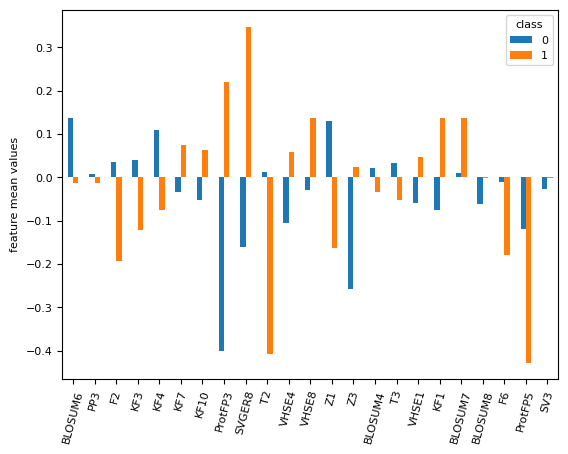

In [14]:
# we go by the Cruciani properties descriptors
#plt.rcParams.update({'font.size': 8})
plot = df6.groupby('class')['BLOSUM6', 'PP3', 'F2','KF3', 'KF4', 'KF7', 'KF10', 'ProtFP3',
              'SVGER8', 'T2', 'VHSE4', 'VHSE8', 'Z1', 'Z3', 'BLOSUM4','T3', 'VHSE1', 'KF1', 'BLOSUM7', 'BLOSUM8','F6',
              'ProtFP5','SV3'].mean()
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.xticks(rotation=75)
plt.ylabel('feature mean values')
plt.savefig("variation_AOP.svg", bbox_inches='tight', dpi=300)
plt.show()

In [8]:
plt.figure(figsize=(15,15))
correlations = X_train.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=False, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);
plt.rcParams['font.size'] = 6

NameError: name 'X_train' is not defined

<Figure size 1500x1500 with 0 Axes>

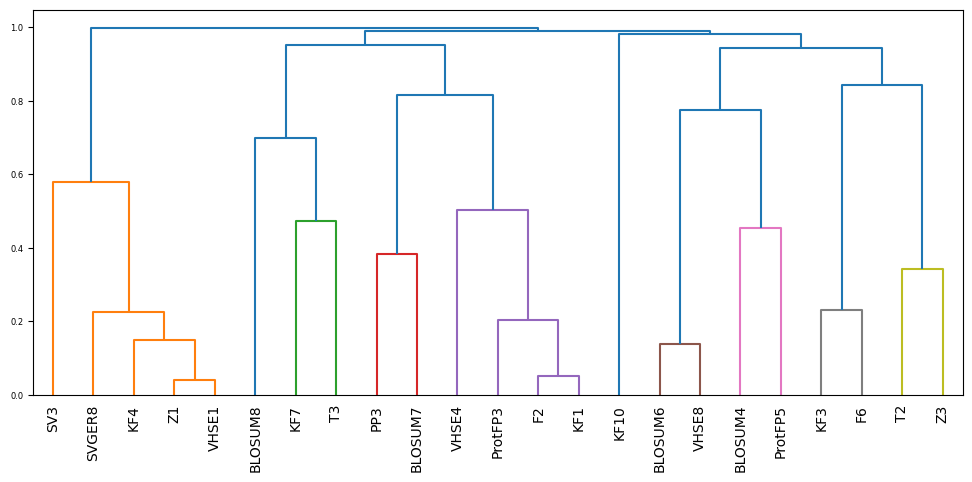

In [79]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=X_train.columns, orientation='top', 
           leaf_rotation=90);

In [80]:
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([5, 3, 4, 6, 1, 2, 8, 4, 1, 7, 4, 5, 1, 7, 5, 2, 1, 4, 3, 2, 6, 5,
       1], dtype=int32)

In [81]:
import numpy as np

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(X_train.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(X_train[i])
    else:
        df_to_append = pd.DataFrame(X_train[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

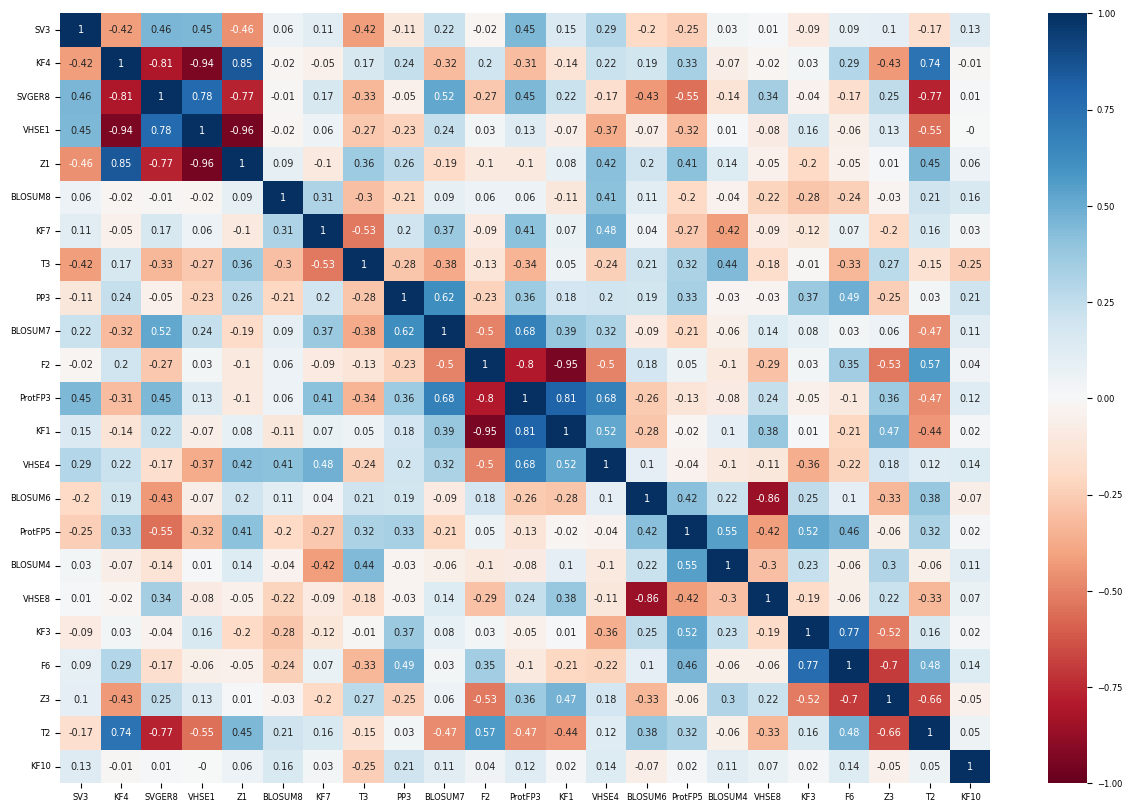

In [82]:
plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

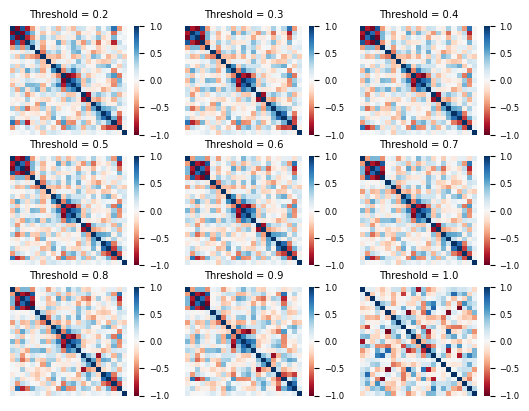

In [83]:
for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(X_train.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(X_train[i])
        else:
            df_to_append = pd.DataFrame(X_train[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))


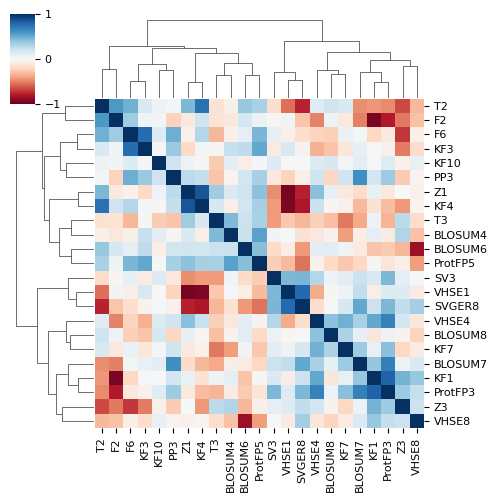

In [84]:
plt.rcParams.update({'font.size': 8})
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=False, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(5,5));
plt.rcParams['font.size'] = 10
plt.savefig('cor_AOP.svg',dpi=2000)

In [196]:
X_train.shape

(1665, 21)

In [43]:
rf.fit(X_train, y_train)
model1.fit(X_train, y_train)

# predict probabilities
pred_prob1 = rf.predict_proba(X_test)
pred_prob2 = model1.predict_proba(X_test)
pred_prob3 = neigh.predict_proba(X_test)
pred_prob4 = LR.predict_proba(X_test)
pred_prob5 = clf.predict_proba(X_test)
pred_prob6 = OXTree.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh4 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score1, auc_score2, auc_score3)

0.8914098613251157 0.8104006163328197 0.8401386748844376


C:\Users\kuagbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\kuagbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


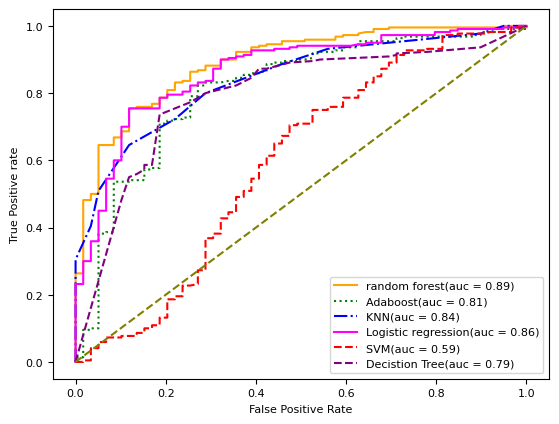

In [44]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.rcParams.update({'font.size': 8})
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label= 'random forest(auc = %0.2f)'%auc_score1)
plt.plot(fpr2, tpr2, linestyle=':',color='green', label='Adaboost(auc = %0.2f)'%auc_score2)
plt.plot(fpr3, tpr3, linestyle='-.',color='blue', label='KNN(auc = %0.2f)'%auc_score3)
plt.plot(fpr4, tpr4, linestyle='solid',color='magenta', label='Logistic regression(auc = %0.2f)'%auc_score4)
plt.plot(fpr5, tpr5, linestyle='dashed',color='red', label='SVM(auc = %0.2f)'%auc_score5)
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Decistion Tree(auc = %0.2f)'%auc_score6)
plt.plot(p_fpr, p_tpr, linestyle='--', color='olive')
# title
#plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_AOP.svg',dpi=2000)
plt.show();

In [63]:
df6.to_excel('train_features.xlsx')

In [91]:
explainer = shap.TreeExplainer(rf)

In [92]:
shap_values = explainer.shap_values(X_test)

In [93]:
shap_values = explainer.shap_values(X_test)

In [94]:
model = RandomForestRegressor()

In [95]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
explainer = shap.Explainer(model.predict, X_test)

In [106]:
shap_values = explainer(X_test)

PermutationExplainer explainer: 280it [00:45,  4.61it/s]                                                               


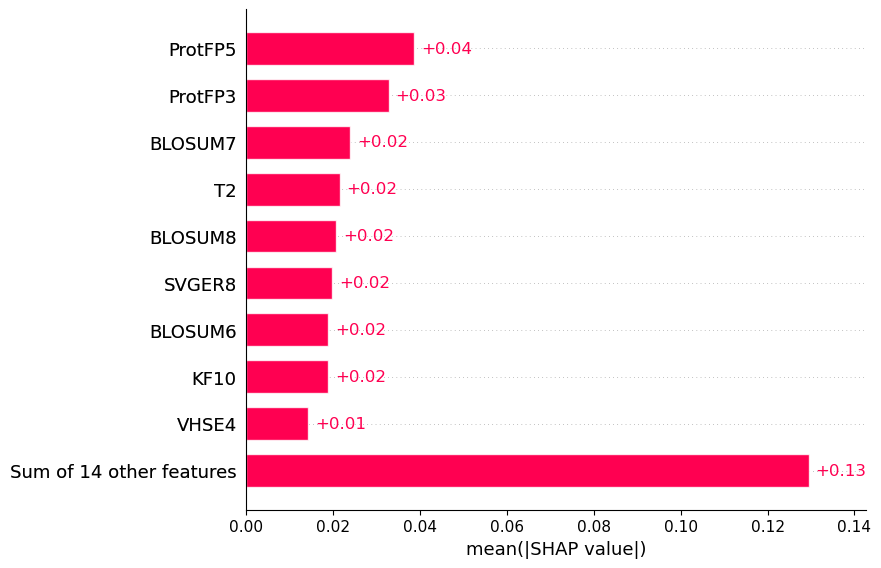

In [98]:
shap.plots.bar(shap_values)

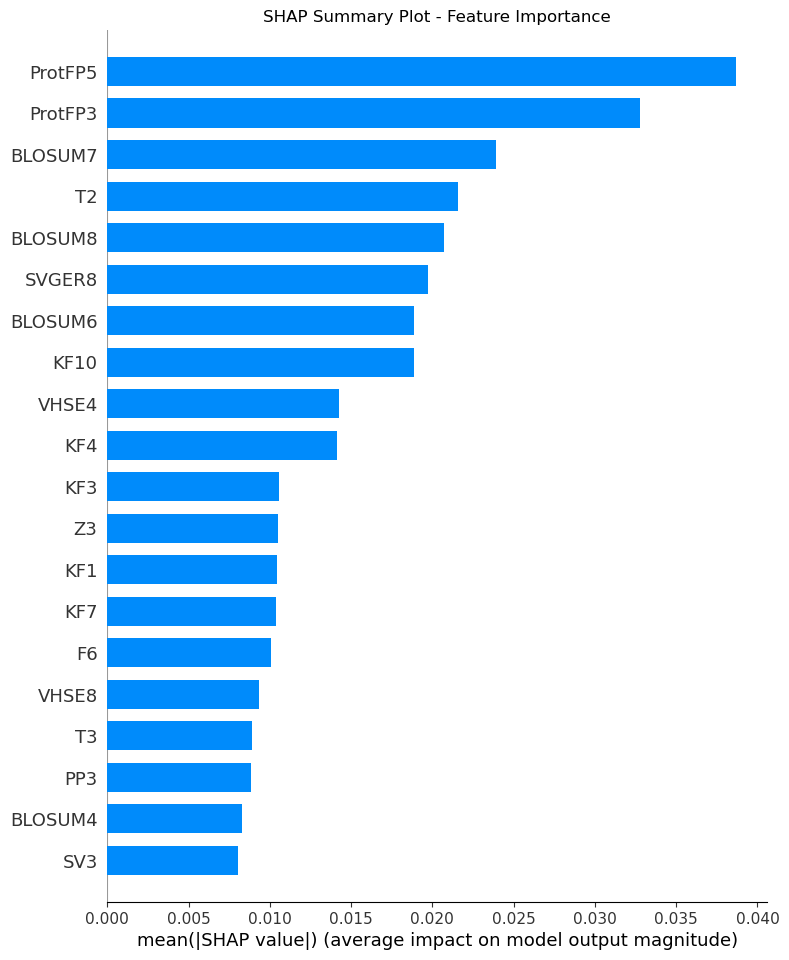

In [100]:
features = X_train.columns.tolist()

shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar", show = False)
plt.title("SHAP Summary Plot - Feature Importance")
plt.savefig("importance11_AOP.svg", dpi=2000)

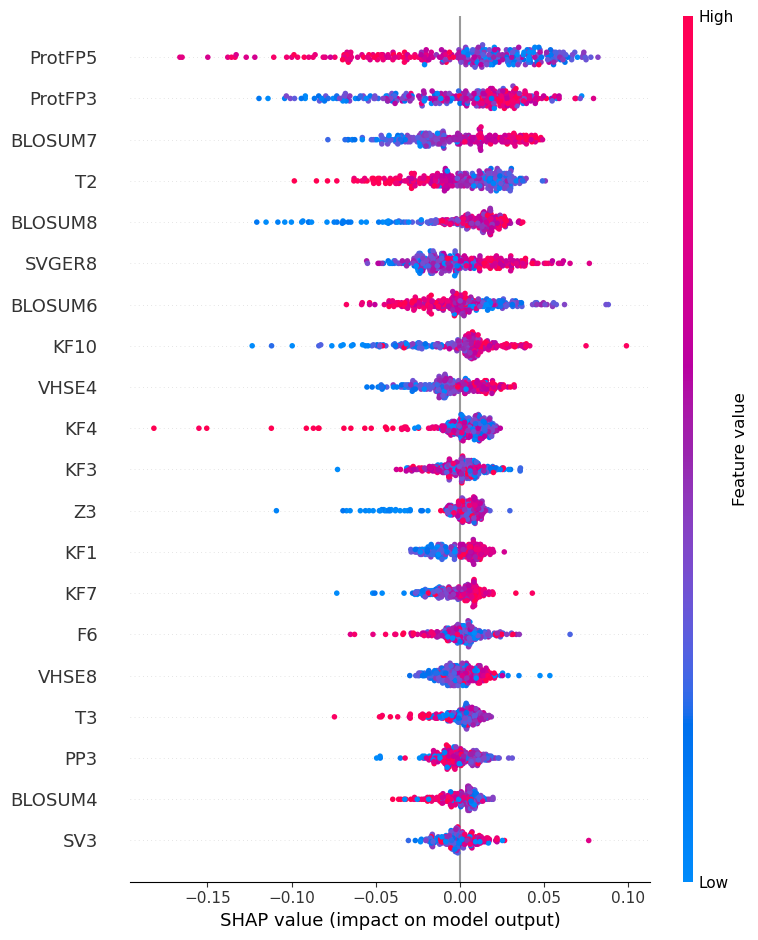

In [102]:
shap.summary_plot(shap_values, X_test, show = False)
plt.savefig("trend1_AOP.svg", dpi=2000)

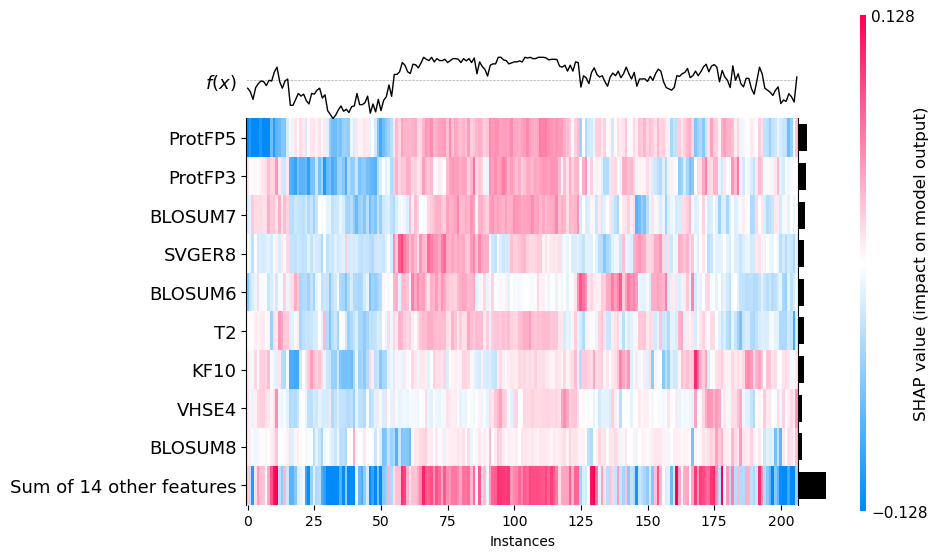

In [65]:
shap.plots.heatmap(shap_values[:207])

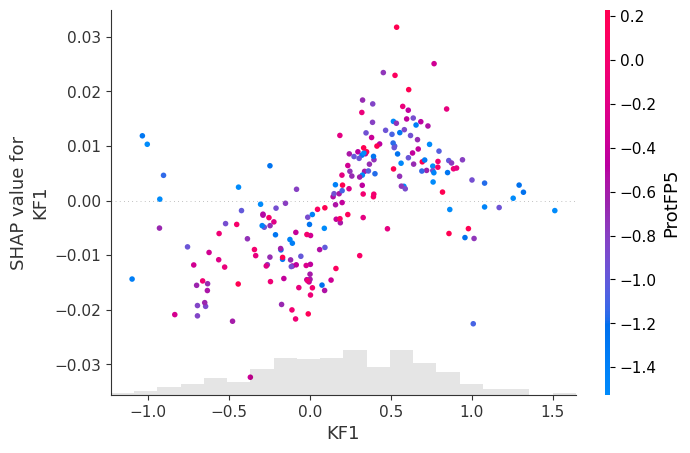

In [70]:
shap.plots.scatter(shap_values[:, "KF1"], color=shap_values)

In [107]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_test)

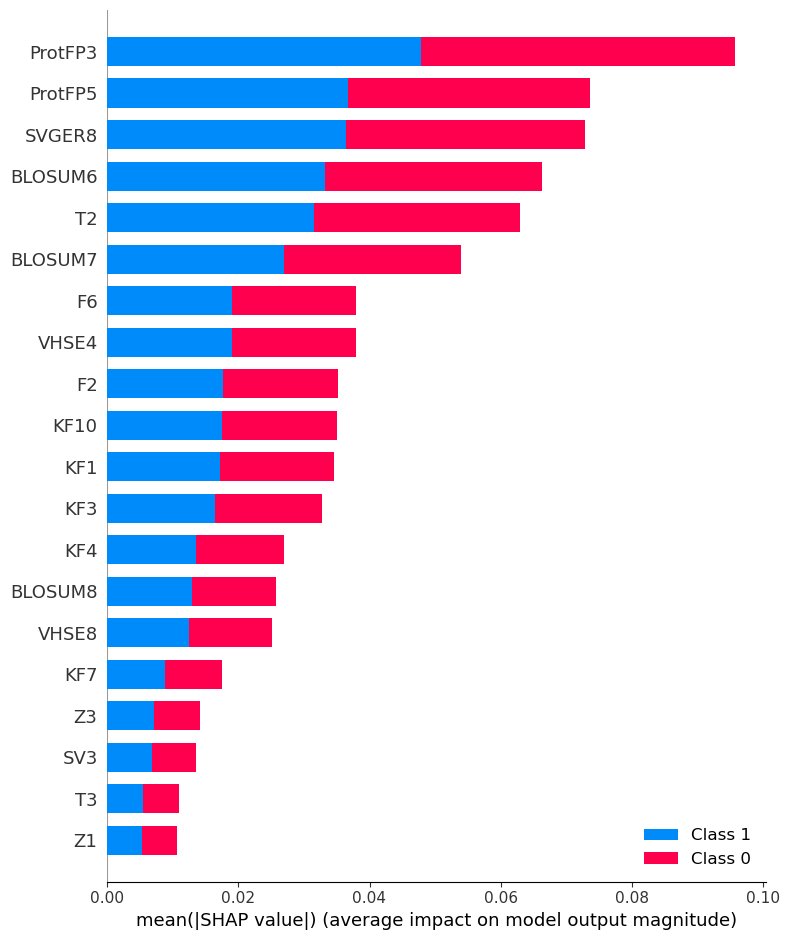

In [108]:
shap.summary_plot(shap_values, X_test, show = False)
plt.savefig("importance_AOP.svg", dpi=2000)

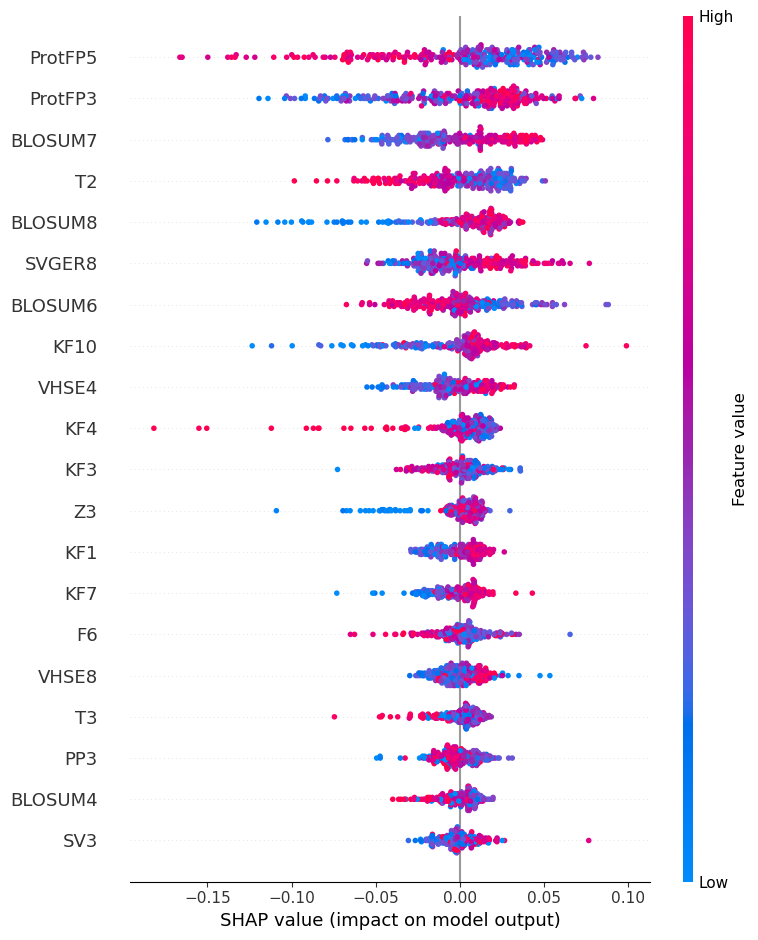

In [104]:
shap.summary_plot(shap_values, X_test, show = False)


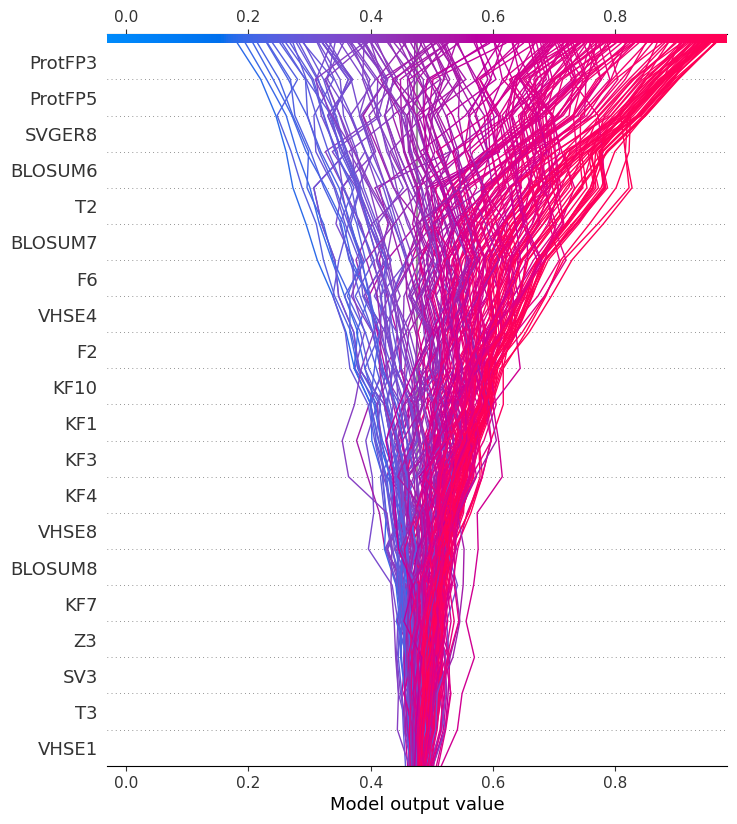

In [78]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

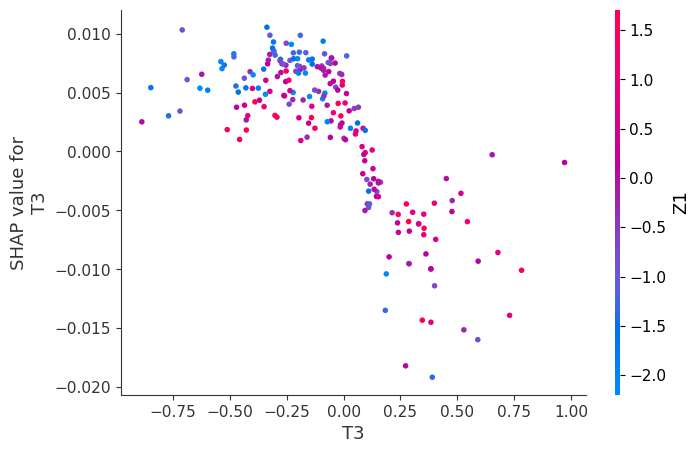

In [88]:
shap.dependence_plot("T3", shap_values[1], X_test,interaction_index="Z1")

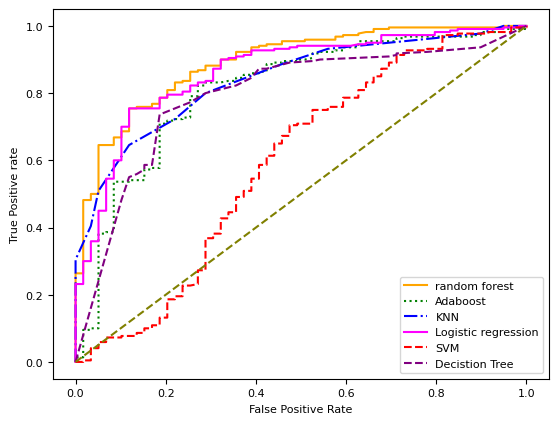

In [45]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.rcParams.update({'font.size': 8})
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label= 'random forest')
plt.plot(fpr2, tpr2, linestyle=':',color='green', label='Adaboost')
plt.plot(fpr3, tpr3, linestyle='-.',color='blue', label='KNN')
plt.plot(fpr4, tpr4, linestyle='solid',color='magenta', label='Logistic regression')
plt.plot(fpr5, tpr5, linestyle='dashed',color='red', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Decistion Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='olive')
# title
#plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_AOP.svg',dpi=2000)
plt.show();

0        14
1        14
2        14
3        17
4        14
         ..
20999    22
21000    17
21001    14
21002    55
21003    13
Name: len, Length: 21004, dtype: int64

In [127]:
data = oat[oat['QCM_rf']>=0.8]

In [128]:
data

,seq,pred_rf,QCM_rf,len
129,GLLLPQYHNAPGLVY,1,0.829546,15
294,WLSYVPANIGGPLPITK,1,0.848183,17
311,HIVGYPRMGPK,1,0.881476,11
498,GGGQPAGRQSRPLPPAGGQPR,1,0.877978,21
513,GGFNPPAESVGGGIGPFPVR,1,0.932660,20
...,...,...,...,...
20710,KGGGGGGEPNK,1,0.850436,11
20737,AVVALGVPYFPR,1,0.857546,12
20749,HGPALEEYGGGR,1,0.852056,12
20763,YPLPVCISK,1,0.900462,9


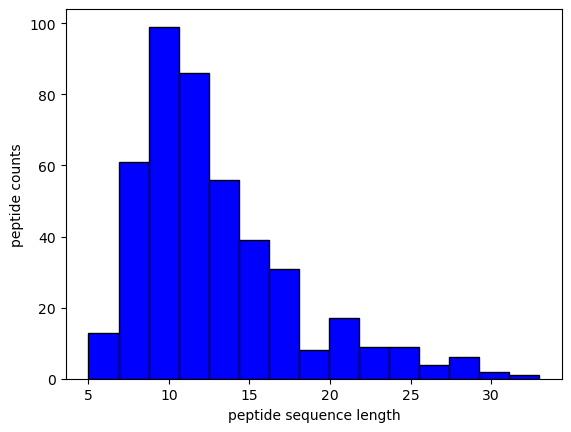

In [129]:
plt.hist(data['len'], color='blue', ec='black', bins=15)
plt.xlabel('peptide sequence length')
plt.ylabel('peptide counts')
plt.savefig('dist_plotAOP.svg', dpi = 2000)
plt.show()

In [154]:
sns.displot(data['mw'], kde=True, bins=15)

KeyError: 'mw'

In [95]:
oat['mw'] = round(oat.apply(lambda x: p.Peptide(x['seq']).molecular_weight(), axis = 1),2)

In [33]:
df.to_excel('ScavenPred_matrix.xlsx')

In [28]:
df = X_train

In [31]:
df = df[df['class'] == 1]

In [32]:
df

,seq,class,BLOSUM6,PP3,F2,KF3,KF4,KF7,KF10,ProtFP3,...,Z3,BLOSUM4,T3,VHSE1,KF1,BLOSUM7,BLOSUM8,F6,ProtFP5,SV3
525,EEHLCFR,1,-0.167143,-0.178571,0.722429,-0.325714,0.130000,0.328571,0.558571,-0.584286,...,-0.020000,0.211429,-0.225714,-0.171429,-0.602857,-0.192857,0.207143,0.091000,-0.052857,0.073000
526,AWVDY,1,0.024000,-0.300000,-0.002200,-0.086000,-0.398000,-0.716000,0.160000,-0.448000,...,0.402000,-0.062000,0.460000,0.374000,-0.008000,-0.250000,-0.030000,-0.283000,-0.198000,0.064800
527,MSFRFY,1,0.201667,0.020000,0.100833,0.198333,-0.310000,0.053333,0.103333,0.625000,...,0.111667,0.195000,-0.668333,0.420000,0.098333,0.155000,-0.076667,0.442333,0.291667,0.190333
528,EPLRY,1,-0.408000,-0.102000,-0.000400,-0.166000,0.126000,0.382000,0.398000,0.362000,...,-0.566000,-0.252000,-0.320000,-0.092000,0.234000,0.170000,0.018000,0.093000,-1.090000,0.073800
529,RKPPWPP,1,-1.077143,0.177143,-1.039571,-0.597143,-0.142857,0.398571,-0.027143,2.640000,...,0.280000,-0.935714,-0.720000,-0.037143,1.202857,0.532857,-0.212857,-0.132429,-1.931429,0.079571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,PADVTPEEKPEV,1,-0.441667,-0.231667,-0.030083,-0.480833,0.277500,-0.120833,0.092500,-0.847500,...,0.085833,-0.328333,0.161667,-0.322500,-0.059167,-0.125833,-0.106667,-0.482083,-1.336667,-0.092750
1659,LQAEVEELRAALE,1,0.119231,-0.252308,0.977154,-0.506923,0.241538,0.240769,0.009231,-2.137692,...,-0.737692,-0.247692,0.143077,-0.143077,-1.122308,-0.115385,0.164615,-0.251077,-0.938462,-0.072615
1660,DVCGRDVNGY,1,0.222000,-0.030000,-0.563400,0.296000,0.157000,-0.050000,0.445000,0.300000,...,0.322000,0.324000,0.284000,-0.285000,0.546000,-0.067000,0.258000,-0.082600,0.657000,-0.088600
1664,GSAGPAGPSGPRGP,1,-0.033571,0.351429,-1.351500,-0.428571,-0.116429,0.324286,0.049286,2.165000,...,0.654286,-0.214286,-0.090000,-0.187857,1.018571,0.817857,0.102143,-0.626429,-0.825714,-0.062571


In [57]:
data = oat[oat['QCM_rf']>=0.8]

In [58]:
data['mw'] = round(data.apply(lambda x: p.Peptide(x['seq']).molecular_weight(), axis = 1),2)

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_5292\3852637714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mw'] = round(data.apply(lambda x: p.Peptide(x['seq']).molecular_weight(), axis = 1),2)


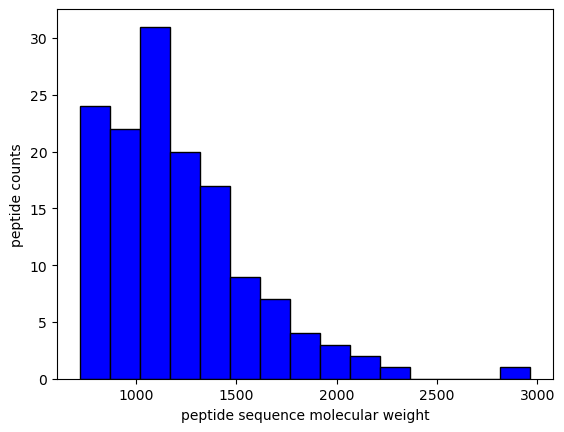

In [62]:
plt.hist(data['mw'], color='blue', ec='black', bins=15)
plt.xlabel('peptide sequence molecular weight')
plt.ylabel('peptide counts')
plt.savefig('dist_plotScavenpred_bambara_mw.svg', dpi = 1000)
plt.show()

In [68]:
oat['len'].min()

5

In [63]:
data.shape

(141, 5)

In [70]:
oat['mw'].min()

653.79

In [71]:
oat['mw'].max()

5260.91

In [4]:
df.to_excel('AOP_training.xlsx')

In [10]:
df6.shape

(1664, 90)